<a href="https://colab.research.google.com/github/riskakurniaa/PCVK_Ganjil_2024/blob/main/Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : **Riska Kurnia Triwulandari**  
Kelas : **3A**  
NIM   : **2241720039**

##**Tugas Praktikum**

Akses Folder Images pada Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


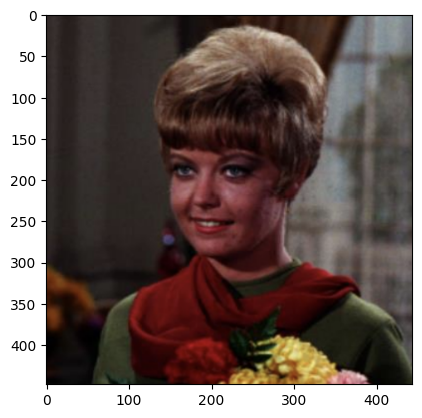

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img_f = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

1. **Buat Gamma Correction sesuai dengan petunjuk berikut**

    Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


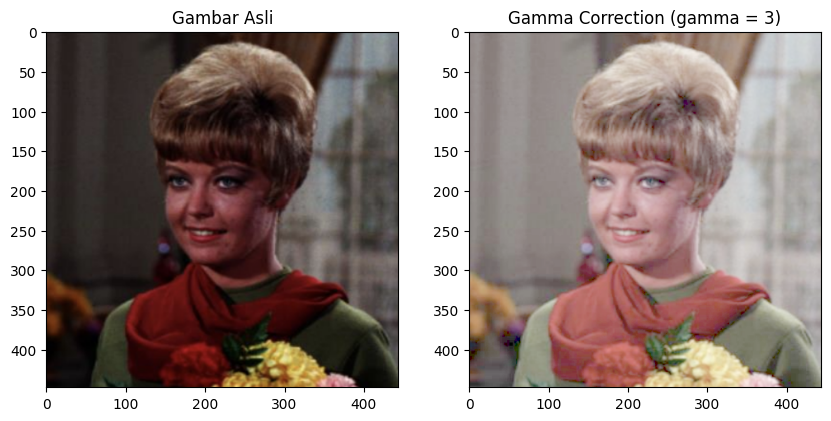

In [ ]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title(f'Gamma Correction (gamma = {gamma})')

plt.show()

2. **Buat Simulasi Image Depth**

    Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst

Image Depth pada citra
----------------------


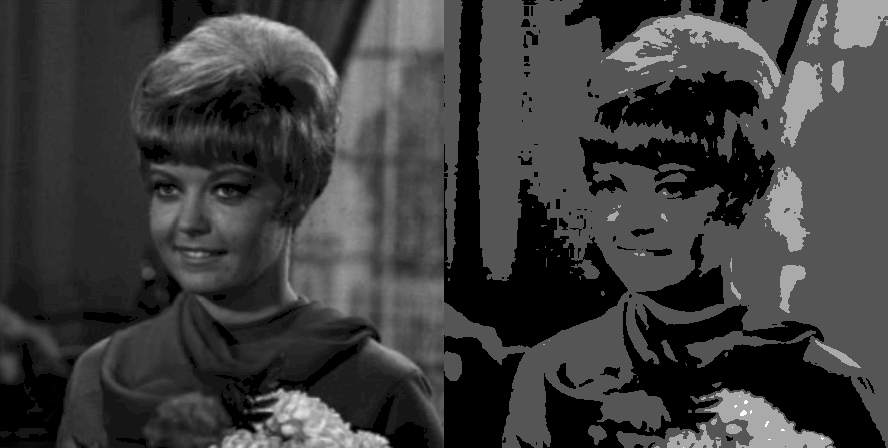

In [ ]:
print('Image Depth pada citra')
print('----------------------')

bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)
img_depth = np.zeros(original.shape,original.dtype)

# melakukan akses setiap piksel pada grayscale
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    img_depth[y,x] = np.clip(round(original[y,x] / level)*level,0,255)

final_frame = cv.hconcat((original,img_depth))
cv2_imshow(final_frame)

3. **Buat modul Average Denoising**

    Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).

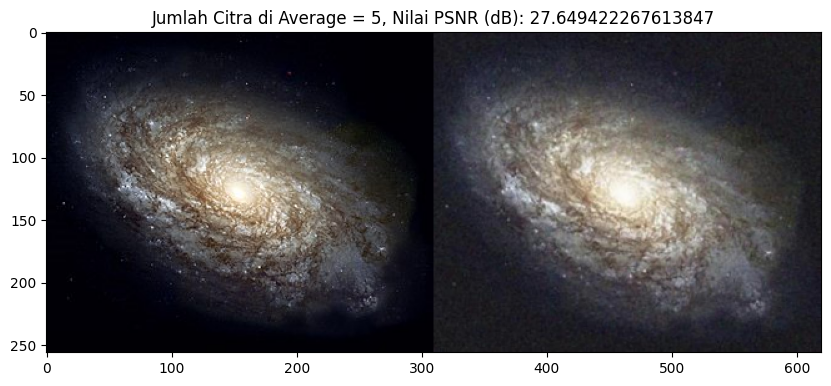

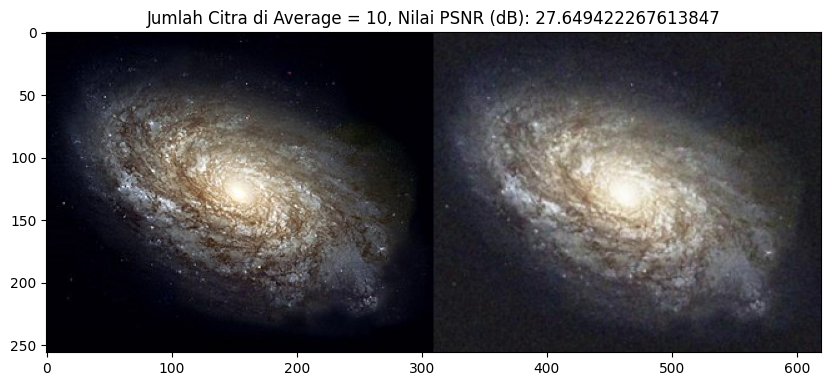

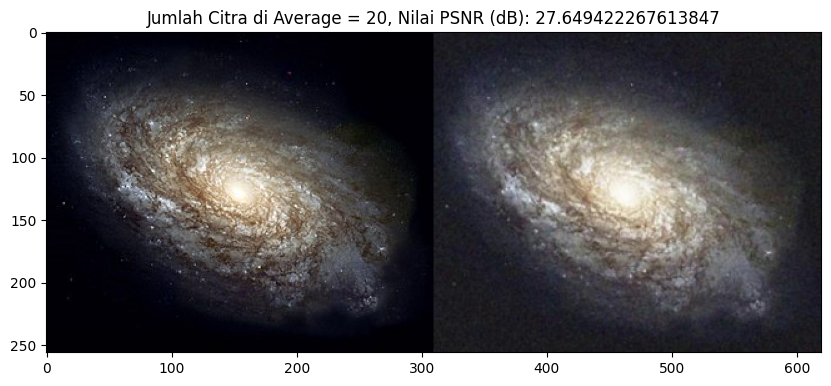

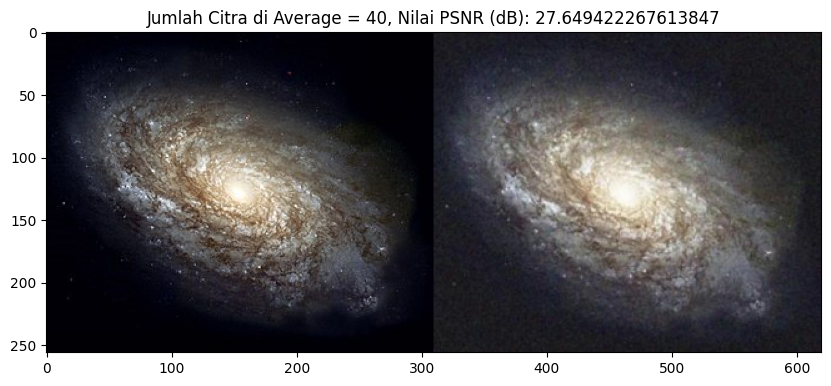

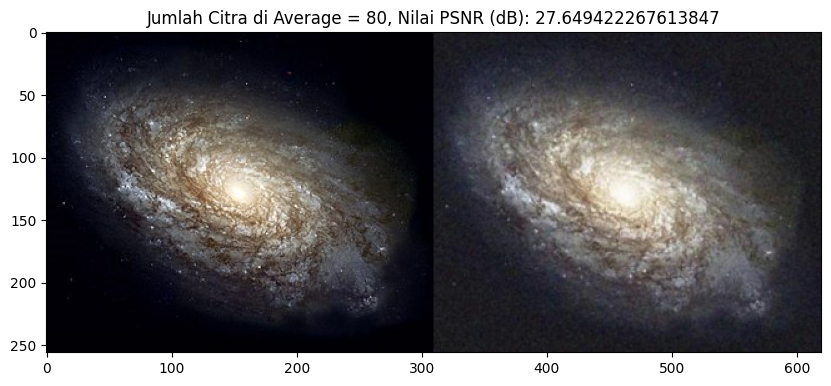

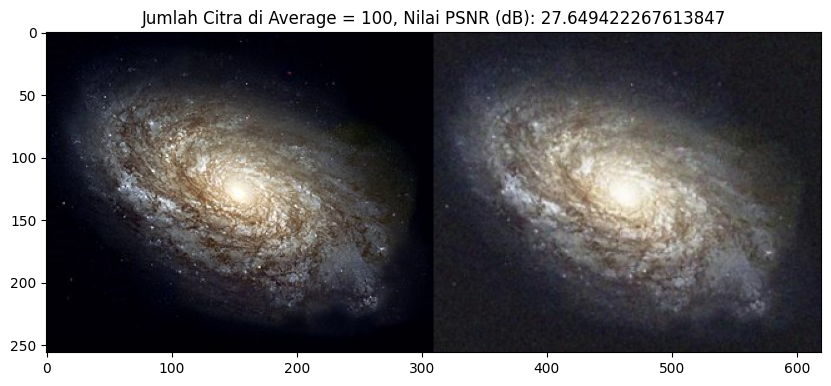

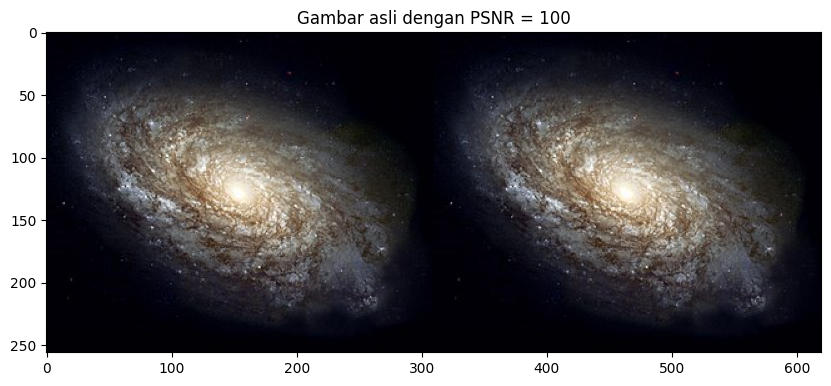

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung PSNR
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)  # Menghitung Mean Squared Error (MSE)
    if mse == 0:  # Jika tidak ada noise, PSNR mencapai maksimum
        psnr = 100
    else:
        max_pixel = 255.0
        psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Memuat gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# Cek apakah gambar asli berhasil dimuat
if original is None:
    print("Error: Gambar asli tidak ditemukan atau path salah.")
else:
    # Daftar jumlah gambar dengan level noise berbeda yang akan di-average
    list_img = [5, 10, 20, 40, 80, 100]

    # Ukuran gambar asli untuk resize
    original_shape = original.shape[:2]  # (tinggi, lebar)

    for img_count in list_img:
        # Membuat array kosong untuk menampung rata-rata gambar dengan noise
        average_noise = np.zeros_like(original, dtype=np.float32)

        # Memuat dan mengakumulasi gambar dengan noise
        for i in range(1, img_count + 1):
            noise = cv.imread(f'/content/drive/MyDrive/PCVK/Images/noises/{i}.jpg')

            # Cek apakah gambar dengan noise berhasil dimuat
            if noise is None:
                print(f"Error: Gambar noise {i}.jpg tidak ditemukan atau path salah.")
                continue

            # Ubah ukuran gambar noise agar sesuai dengan gambar asli
            noise_resized = cv.resize(noise, (original_shape[1], original_shape[0]))

            # Mengakumulasi gambar dengan noise
            average_noise += noise_resized.astype(np.float32)

        # Merata-ratakan gambar yang diakumulasi
        average_noise /= img_count

        # Mengubah gambar yang telah dirata-ratakan kembali ke format uint8
        average_noise = np.clip(average_noise, 0, 255).astype(np.uint8)

        # Menghitung PSNR antara gambar asli dan gambar noise yang dirata-ratakan
        psnr = PSNR(original, average_noise)

        # Menggabungkan gambar asli dan gambar noise yang dirata-ratakan secara horizontal
        final_frame = cv.hconcat([original, average_noise])

        # Menampilkan gambar
        plt.figure(figsize=(10, 5))
        plt.imshow(cv.cvtColor(final_frame, cv.COLOR_BGR2RGB))  # Mengonversi BGR ke RGB agar tampilan benar
        plt.title(f"Jumlah Citra di Average = {img_count}, Nilai PSNR (dB): {psnr:}")
        plt.show()

    # PSNR antara gambar asli dan gambar yang dirata-rata (harusnya PSNR tertinggi)
    psnr = PSNR(original, original)
    final_frame = cv.hconcat([original, original])

    plt.figure(figsize=(10, 5))
    plt.imshow(cv.cvtColor(final_frame, cv.COLOR_BGR2RGB))  # Mengonversi BGR ke RGB untuk tampilan yang benar
    plt.title(f"Gambar asli dengan PSNR = {psnr:}")
    plt.show()


Kesimpulannya adalah semakin nilai PNSR mendekati 100, maka noise dari gambar tersebut semakin sedikit

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:

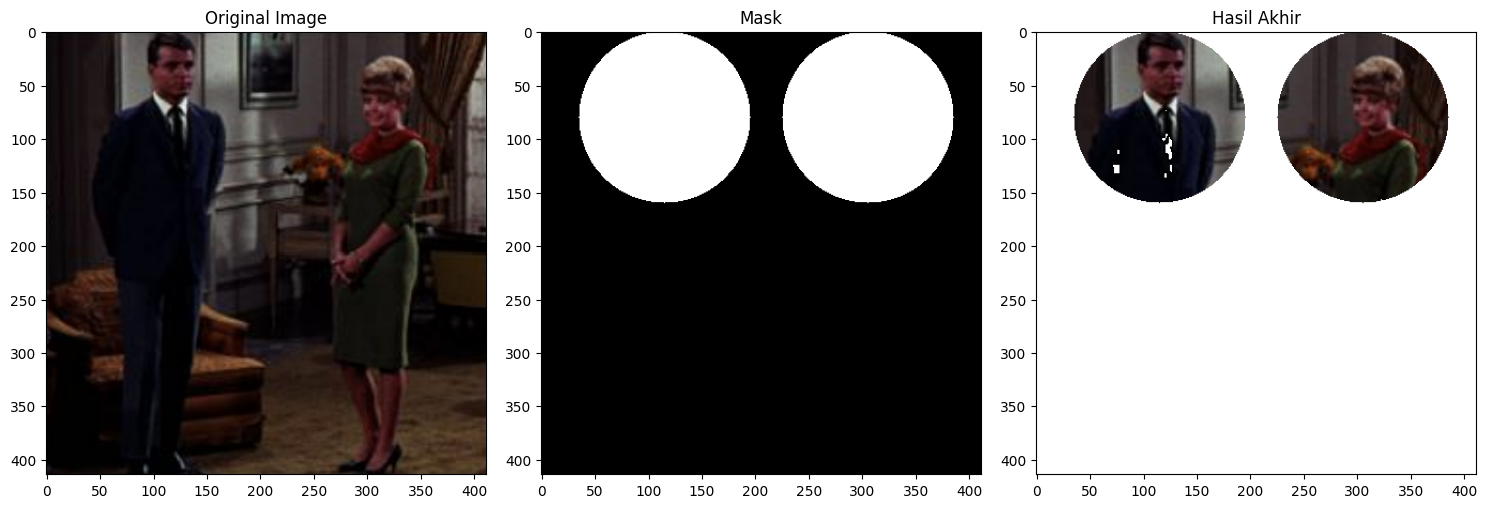

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/drive/MyDrive/PCVK/Images/couple.tiff'
img = cv.imread(image_path)

# Create a mask with the same shape as the image (for the first two dimensions)
mask = np.zeros(img.shape[:2], dtype="uint8")

# Draw two circles on the mask
cv.circle(mask, (115, 80), 80, 255, -1)  # First circle
cv.circle(mask, (305, 80), 80, 255, -1)  # Second circle

# Apply bitwise AND using the mask
masked = cv.bitwise_and(img, img, mask=mask)

# Convert the masked image to grayscale
tmp = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)

# Apply threshold to create an alpha channel
_, alpha = cv.threshold(tmp, 0, 255, cv.THRESH_BINARY)

# Split the color channels
b, g, r = cv.split(masked)

# Merge the channels with the alpha channel into an RGBA image
rgba = [b, g, r, alpha]
result = cv.merge(rgba)

# Menampilkan hasil
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('on')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGRA2RGBA))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

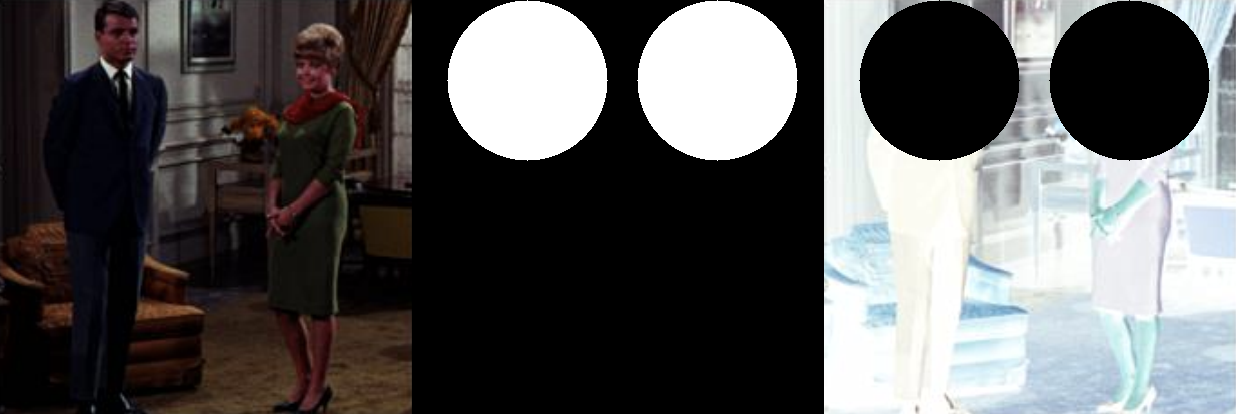

In [ ]:
# menggunakan operator not
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (115,80), 80, (255,255,255), -1)

result = img & mask

mask2 = np.zeros(img.shape,dtype=np.uint8)
mask2 = cv.circle(mask, (305,80), 80, (255,255,255), -1)

result = img & mask2

masked = ~img & ~mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

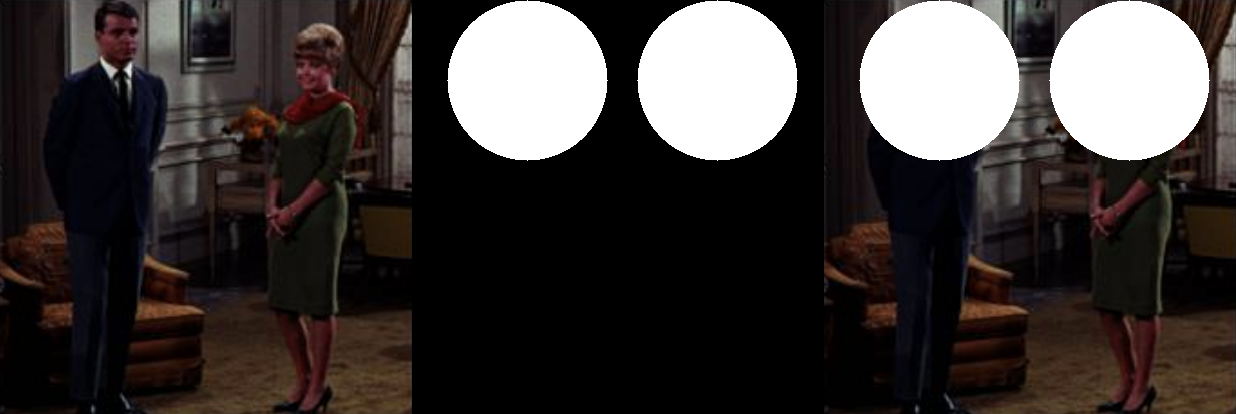

In [ ]:
# menggunakan operator or
mask = np.zeros(img.shape,img.dtype)
mask = cv.circle(mask, (115,80), 80, (255,255,255), -1)

result = img & mask

mask2 = np.zeros(img.shape, img.dtype)
mask2 = cv.circle(mask, (305,80), 80, (255,255,255), -1)

result = img & mask2

masked = img | mask

final_frame = cv.hconcat((img,mask,masked))
cv2_imshow(final_frame)

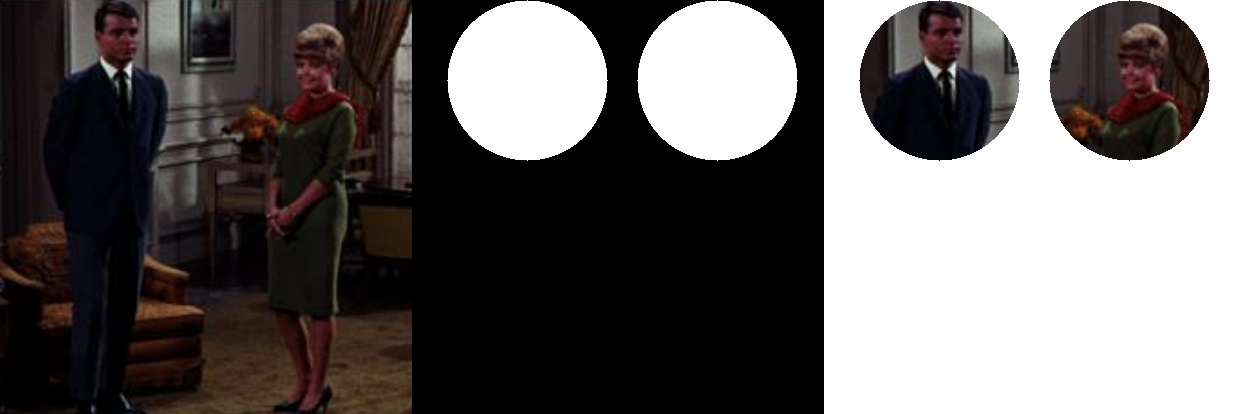

In [ ]:
# menggunakan operator and
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (115,80), 80, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (305,80), 80, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255

final_frame = cv.hconcat((img,mask,result))
cv2_imshow(final_frame)

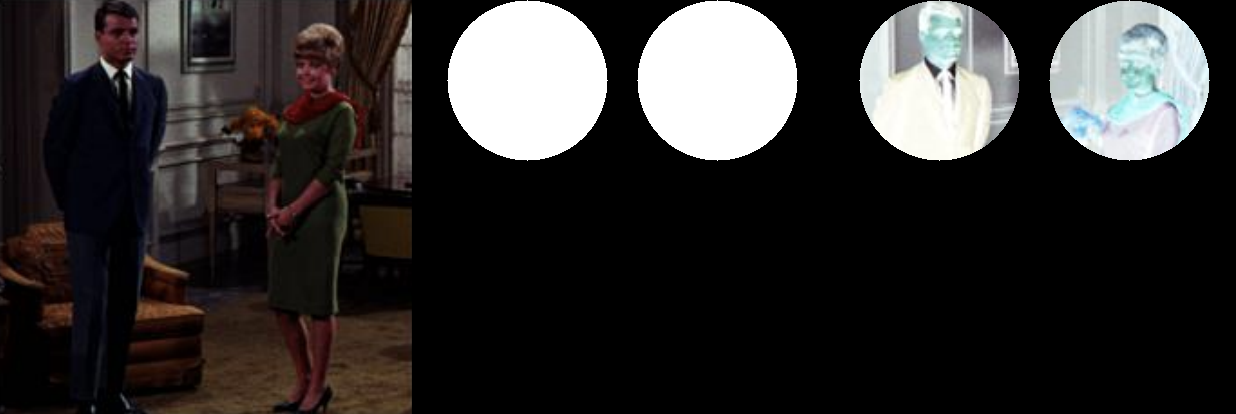

In [ ]:
# menggunakan operator nand
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (115,80), 80, (255,255,255), -1)
mask2 = np.zeros(img.shape,dtype=np.uint8)
mask2 = cv.circle(mask, (305,80), 80, (255,255,255), -1)

masked = ~img & mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

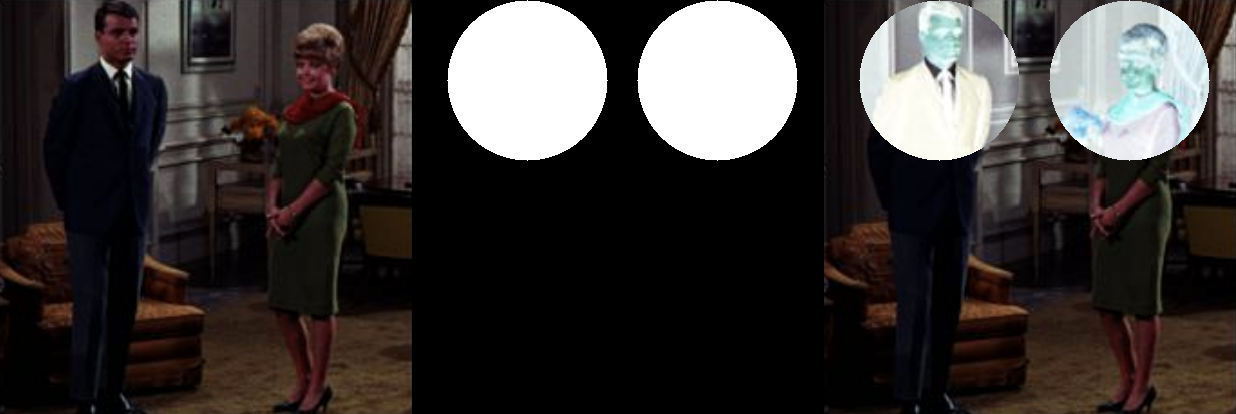

In [ ]:
# menggunakan operator xor
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (115,80), 80, (255,255,255), -1)
mask2 = np.zeros(img.shape,dtype=np.uint8)
mask2 = cv.circle(mask, (305,80), 80, (255,255,255), -1)

masked = cv.bitwise_xor(img, mask)

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

### Hasil Analisa :

Kode program ini menggunakan beberapa operator bitwise (NOT, OR, AND, NAND, XOR) untuk memanipulasi dan memvisualisasikan gambar dengan cara yang berbeda. Di bawah ini adalah analisis dari setiap operator yang digunakan:

1. **Operator NOT**

    Dalam kode ini, area yang dilindungi oleh mask (lingkaran) menjadi hitam, sementara area di luar lingkaran ditampilkan dalam warna asli gambar. Dengan kata lain, masked adalah invers dari gambar asli. Hasil ini memungkinkan kita untuk melihat bagian luar lingkaran dengan jelas.

2. **Operator OR**
    
    Menggunakan operator OR, gambar asli digabungkan dengan mask. Hasilnya menunjukkan area yang ada di dalam lingkaran dengan jelas. Dengan operator ini, kombinasi dari gambar asli dan mask memperlihatkan area yang tercakup oleh lingkaran, memberikan tampilan yang lebih terang pada bagian tersebut.

3. **Operator AND**

    Operator AND menghasilkan gambar terfilter yang hanya menunjukkan area di dalam dua lingkaran mask. Area di luar lingkaran menjadi putih (atau background), sementara bagian dalam lingkaran tetap terlihat. Ini membantu dalam mengisolasi objek yang diinginkan dalam gambar.

4. **Operator NAND**

    Menggunakan hasil invers dari AND, efek masked menunjukkan gambar yang tidak dilindungi oleh kedua lingkaran. Dalam hal ini, gambar asli ditampilkan tanpa bagian yang tertutup oleh mask, sehingga area yang terlindungi tidak terlihat.

5. **Operator XOR**

    Dengan menggunakan operator XOR, hasil masked hanya menunjukkan bagian gambar yang tidak dilindungi oleh mask. Ini menciptakan efek visual yang menarik, di mana area yang dilindungi oleh lingkaran tidak ditampilkan, sedangkan area di luar lingkaran terlihat jelas.